In [1]:
import pandas as pd
import  ternary
import matplotlib.pyplot as plt

This file is used to merge the data that was obtained by the batchruns. Since we split the batchruns into two different "sets", so that not all the repetitions had to be done by a single computer, we have the data in two seperate files. However, you should adjust the path to correct folder for your own purposes.

In [8]:
# Define the possible values, needed for the plots
values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

combinations = []

# Iterate over possible values of a, b, c in increments of 0.1
for a in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
    for b in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
        for c in range(0, 11):  # This corresponds to 0 to 1 in steps of 0.1
            if a + b + c == 10:  # We check if the sum is 10 (which corresponds to 1.0 in the original scale)
                combinations.append((a / 10, b / 10, c / 10))  # Convert back to original scale

In [7]:
# we want to have all the titles to be able to merge the files
titles = []
repetitions = 15
n_step = 500
col_names = ["w_sim", "w_prox", "w_pop", "repeat", "avg clustering coeff", "modularity"]
df_merged = pd.DataFrame(columns=col_names)

col_names2 = ["w_sim", "w_prox", "w_pop", "avg clustering coeff", "modularity"]
df_averaged = pd.DataFrame(index=range(len(combinations)), columns=col_names2)

for j in range(repetitions):
    for i in range(len(combinations)):
        a = combinations[i][0]
        b = combinations[i][1]
        c = combinations[i][2]
        title =(f"pop{a}prox{b}sim{c}_repeat{j + 1}.csv")
        df = pd.read_csv(f"simulation_results\{title}")
        df_merged.loc[i] = df.loc[n_step]
        df_merged.iat[i, 3] = j + 1 # repeat
        df_merged.iat[i, 0] = b # wsim
        df_merged.iat[i, 1] = c # wprox
        df_merged.iat[i, 2] = a # wpop

for j in range(repetitions):
    for i in range(len(combinations)):
        a = combinations[i][0] #wpop
        b = combinations[i][1] #wsim
        c = combinations[i][2] #wprox
        title =(f"pop{a}prox{b}sim{c}_repeat{j + 1}.csv")
        df = pd.read_csv(f"simulation_results2\{title}")
        df_merged.loc[i] = df.loc[n_step]
        df_merged.iat[i, 3] = j + 16 # repeat
        df_merged.iat[i, 0] = b # wsim
        df_merged.iat[i, 1] = c # wprox
        df_merged.iat[i, 2] = a # wpop

for i in range(len(combinations)):
    w_pop = float(combinations[i][0])
    w_prox = float(combinations[i][1])
    w_sim = float(combinations[i][2])
    subset = df_merged.loc[(df_merged["w_pop"] == w_pop) & (df_merged["w_prox"] == w_prox) & (df_merged["w_sim"] == w_sim)]
    df_averaged.iat[i, 0] = w_sim
    df_averaged.iat[i, 1] = w_prox
    df_averaged.iat[i, 2] = w_pop
    df_averaged.iat[i, 3] = subset["avg clustering coeff"].mean()
    df_averaged.iat[i, 4] = subset["modularity"].mean()

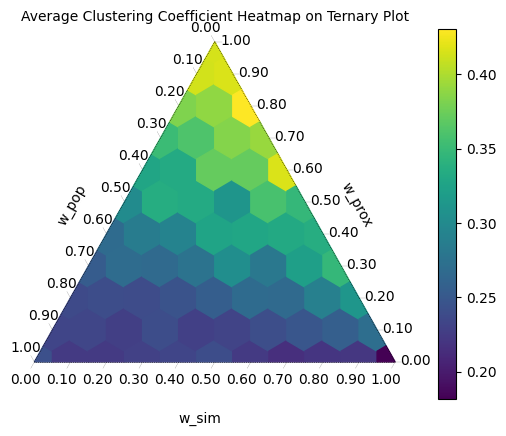

In [4]:
# for the ternary plot average clustering coef
heatmap_data = {}
for _, row in df_averaged.iterrows():
    # Convert weights to percentage format (assuming the scale is 100)
    w_pop, w_prox, w_sim = row['w_pop']*10, row['w_prox']*10, row['w_sim']*10
    avg_clustering_coeff = row['avg clustering coeff']
    heatmap_data[(w_pop, w_prox, w_sim)] = avg_clustering_coeff


# Create the ternary plot
scale = 10
figure, tax = ternary.figure(scale=scale)

# Draw the heatmap
tax.heatmap(heatmap_data, style="hexagonal", cmap='viridis', colorbar=True)

# Draw boundary and gridlines
tax.boundary(linewidth=0, scale=10)
tax.gridlines(color="black", multiple=10)

# Set axis labels
fontsize = 10
offset = 0.15
tax.left_axis_label("w_pop", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_prox", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_sim", fontsize=fontsize, offset=offset)
tax.ticks(axis='lbr', ticks=values, multiple=4, linewidth=0.1, tick_formats="%.2f", offset=0.02)

# Set title
plt.title('Average Clustering Coefficient Heatmap on Ternary Plot', fontsize=10)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Show the plot
plt.show()


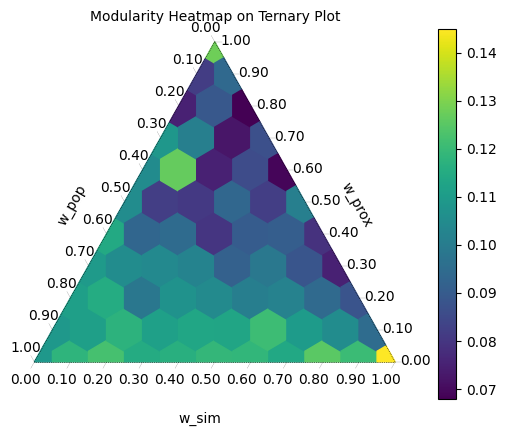

In [5]:
# for the ternary plot average clustering coef
heatmap_data = {}
for _, row in df_averaged.iterrows():
    # Convert weights to percentage format (assuming the scale is 100)
    w_pop, w_prox, w_sim = row['w_pop']*10, row['w_prox']*10, row['w_sim']*10
    avg_clustering_coeff = row['modularity']
    heatmap_data[(w_pop, w_prox, w_sim)] = avg_clustering_coeff


# Create the ternary plot
scale = 10
figure, tax = ternary.figure(scale=scale)

# Draw the heatmap
tax.heatmap(heatmap_data, style="hexagonal", cmap='viridis', colorbar=True)

# Draw boundary and gridlines
tax.boundary(linewidth=0, scale=10)
tax.gridlines(color="black", multiple=10)

# Set axis labels
fontsize = 10
offset = 0.15
tax.left_axis_label("w_pop", fontsize=fontsize, offset=offset)
tax.right_axis_label("w_prox", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("w_sim", fontsize=fontsize, offset=offset)
tax.ticks(axis='lbr', ticks=values, multiple=4, linewidth=0.1, tick_formats="%.2f", offset=0.02)

# Set title
plt.title('Modularity Heatmap on Ternary Plot', fontsize=10)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

# Show the plot
plt.show()
